In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [2]:
features = pd.read_csv("data/EV_train.csv")
labels = pd.read_csv("data/EV_train_labels.csv")

features = features.fillna(features.median())
labels = labels.fillna(labels.median())

In [3]:
features.shape

(1590, 2881)

In [4]:
labels.shape

(1590, 2881)

In [5]:
features.head()

,House ID,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,11655099,0.950,0.826,0.361,0.238,0.342,0.233000,0.351000,0.194000,0.292000,...,0.664,0.783,0.601,0.639,0.417,0.439,0.226,0.190,0.710,0.728
1,11633257,0.353,0.327,0.358,0.292,0.285,0.304000,0.361000,0.342000,0.355000,...,0.536,0.558,0.622,0.634,0.513,0.421,0.273,0.296,0.291,0.289
2,11651552,0.150,0.181,0.150,0.150,0.131,0.125000,0.088000,0.106000,0.094000,...,2.125,0.881,0.481,1.194,0.138,0.119,0.038,0.088,0.056,0.113
3,11636092,2.088,2.075,2.121,2.098,2.046,2.081000,1.847000,0.420000,0.399000,...,0.620,0.487,0.563,0.419,0.379,0.359,0.347,0.325,0.330,0.340
4,11647239,1.416,1.250,1.270,1.258,1.239,1.753105,4.609256,4.619256,4.075151,...,1.596,1.667,1.569,1.664,1.580,1.635,1.568,1.565,1.575,1.571


In [6]:
labels.head()

,House ID,Interval_1,Interval_2,Interval_3,Interval_4,Interval_5,Interval_6,Interval_7,Interval_8,Interval_9,...,Interval_2871,Interval_2872,Interval_2873,Interval_2874,Interval_2875,Interval_2876,Interval_2877,Interval_2878,Interval_2879,Interval_2880
0,11655099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11633257,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11651552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11636092,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11647239,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
feature_matrix = features[features.columns[1:]].values
label_matrix = labels[labels.columns[1:]].values

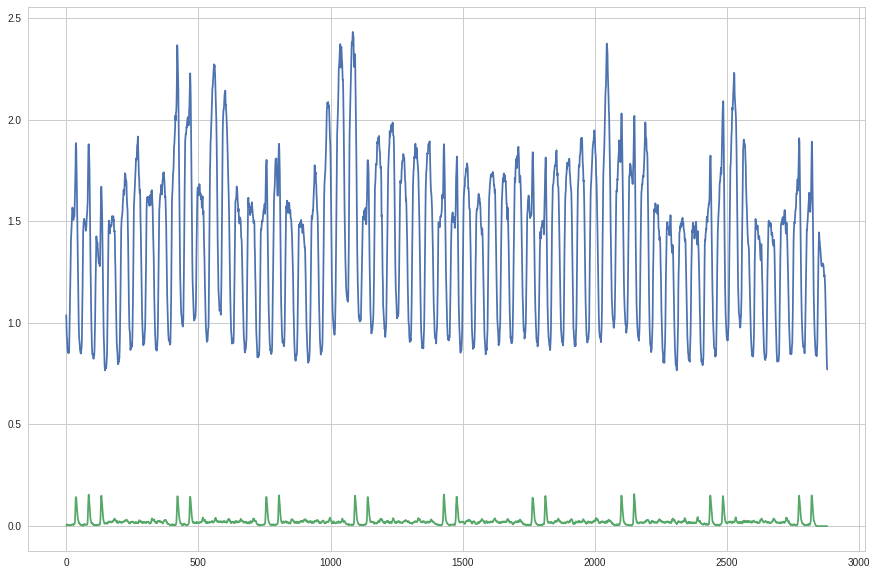

In [8]:
plt.figure(figsize=(15,10))
plt.plot(np.mean(feature_matrix, axis=0))
plt.plot(np.mean(label_matrix, axis=0))
plt.show()

# np.mean(feature_matrix,axis=0)

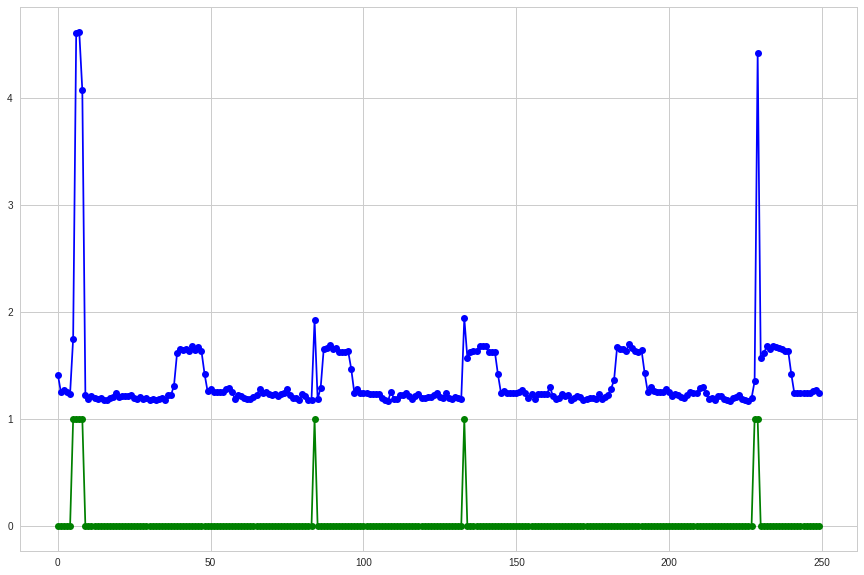

In [9]:
plt.figure(figsize=(15,10))

n = 250

plt.plot(range(n), feature_matrix[4,:n], 'b-o')
plt.plot(range(n),label_matrix[4,:n], 'g-o')

# plt.plot(range(48,96), feature_matrix[4,48:96], 'b-o')
# plt.plot(range(48,96),label_matrix[4,48:96], 'g-o')

plt.show()

In [10]:
total_energy_per_house = np.sum(feature_matrix, axis=1)
top_energy_houses = np.argsort(-total_energy_per_house)

print total_energy_per_house[top_energy_houses[0]]
print total_energy_per_house[top_energy_houses[1]]

244527.077464
131510.776


In [11]:
total_charges_per_house = np.sum(label_matrix, axis=1)
top_charge_houses = np.argsort(-total_charges_per_house)

print total_charges_per_house[top_charge_houses[0]]
print total_charges_per_house[top_charge_houses[1]]

685
685


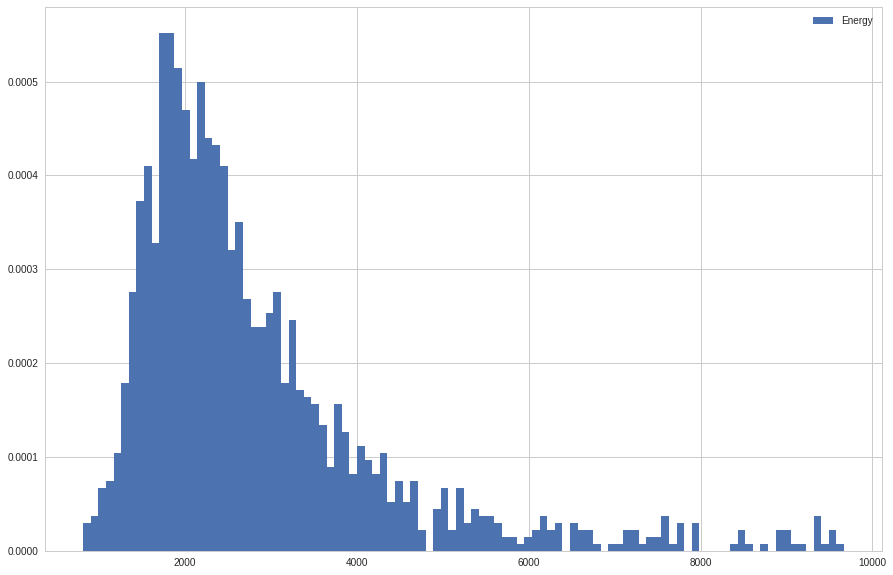

In [12]:
plt.figure(figsize=(15,10))

plt.hist(total_energy_per_house[total_energy_per_house<10000], bins=100, normed=True, label="Energy")
# plt.hist(total_charges_per_house[total_charges_per_house>0], bins=50, normed=True, label="Charges")

plt.legend()

plt.show()

In [13]:
houses_with_electric_cars = np.where(total_charges_per_house>0)[0]

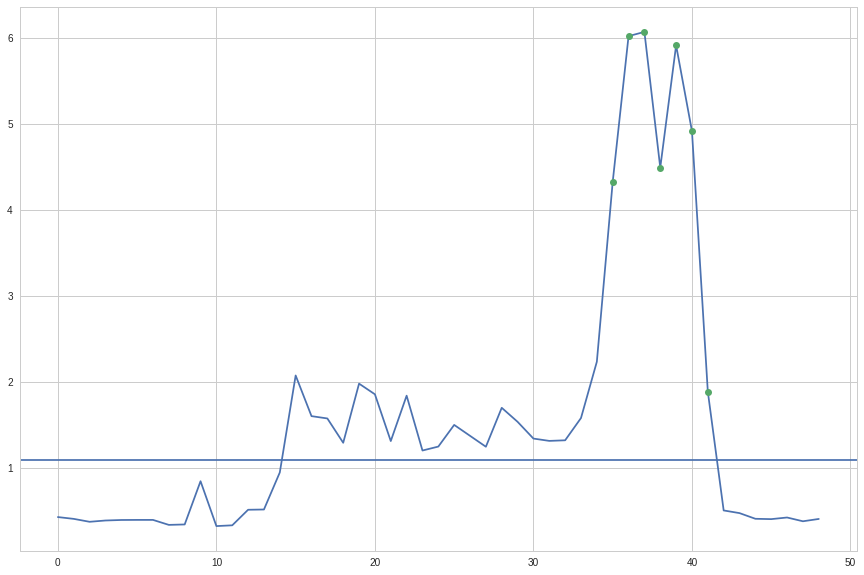

In [14]:
house = houses_with_electric_cars[2]

house_energy = feature_matrix[house,:]
house_charges = label_matrix[house,:]
mean_energy = np.mean(house_energy)

indices = np.arange(len(house_energy))
charge_indices = np.where(house_charges==1)[0]

day_a = 0
day_b = 0

# na = 49
# nb = 97

na = day_a*49
nb = (day_b+1)*48+1

charge_ab = charge_indices[(charge_indices>=na) & (charge_indices<nb)]

plt.figure(figsize=(15,10))
# plt.plot(house_energy[na:nb], '-o')
# plt.plot(house_charges[na:nb], '-o')
plt.plot(indices[na:nb], house_energy[na:nb])
plt.plot(charge_ab, house_energy[charge_ab], 'o')
plt.axhline(y=mean_energy)

plt.show()

In [15]:
houses_with_electric_cars = np.where(total_charges_per_house>0)[0]

In [16]:
electric_car_features = feature_matrix[houses_with_electric_cars, :]
electric_car_labels = label_matrix[houses_with_electric_cars, :]
# (electric_car_features - np.array([np.mean(electric_car_features,axis=1)]).T)
print electric_car_labels.shape
print electric_car_features.shape

(485, 2880)
(485, 2880)


In [17]:
mean_energy_when_charging = np.zeros(485)
mean_energy_not_charging = np.zeros(485)

for n in range(485):
    indices = np.where(electric_car_labels[n,:]==1)[0]
    off_indices = np.where(electric_car_labels[n,:]==0)[0]
    mean_energy_when_charging[n] = np.mean(electric_car_features[n,indices])
    mean_energy_not_charging[n] = np.mean(electric_car_features[n,off_indices])

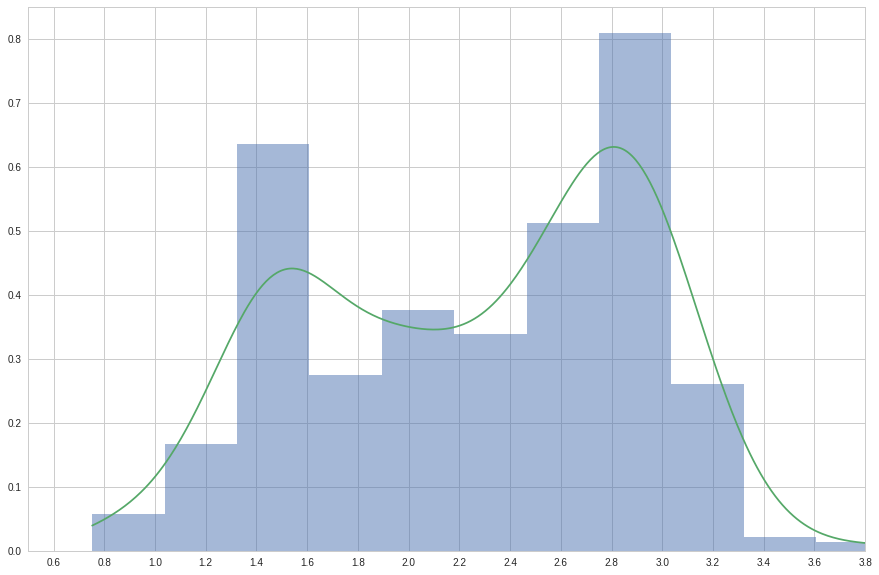

In [26]:
# x_fit = (mean_energy_when_charging - np.mean(electric_car_features,axis=1))
x_fit = mean_energy_when_charging - mean_energy_not_charging
x_plot = np.linspace(np.min(x_fit), np.max(x_fit), 1000)

kde = gaussian_kde(x_fit)


plt.figure(figsize=(15,10))
plt.hist(x_fit,bins=25,normed=True, alpha=0.5)
# plt.hist(mean_energy_when_charging - mean_energy_not_charging,bins=25,normed=True)
plt.plot(x_plot, kde(x_plot))
plt.xticks(np.arange(0,5,0.2))
plt.xlim(0.5,3.8)
plt.show()

In [19]:
print np.where(kde(x_plot)==np.max(kde(x_plot[x_plot<2])))
print np.where(kde(x_plot)==np.max(kde(x_plot[x_plot>2])))

(array([98]),)
(array([292]),)


In [20]:
x_plot[[98,292]]

array([ 1.32296218,  2.58206439])

In [21]:
import peakutils
indexes = peakutils.indexes(house_energy[:49], thres=0.5)

In [22]:
indexes

array([37, 39])

In [23]:
print peakutils.indexes(kde(x_plot))
print kde(x_plot)[peakutils.indexes(kde(x_plot))]
print x_plot[peakutils.indexes(kde(x_plot))]

[ 98 292]
[ 0.46390125  0.73539351]
[ 1.32296218  2.58206439]
